# Miscellaneous examples

## Compact estimator representations

This example illustrates the use of the print_changed_only global parameter.

Setting print_changed_only to True will alternate the representation of estimators to only show the parameters that have been set to non-default values. This can be used to have more compact representations.

In [2]:
print(__doc__)

from sklearn.linear_model import LogisticRegression
from sklearn import set_config

lr = LogisticRegression(penalty='l1')
print('Default representation:')
print(lr)

set_config(print_changed_only=True)
print('\nWith changed_only option:')
print(lr)

Automatically created module for IPython interactive environment
Default representation:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


TypeError: set_config() got an unexpected keyword argument 'print_changed_only'

## ROC Curve with Visualization API

Scikit-learn defines a simple API for creating visualizations for machine learning. The key features of this API is to allow for quick plotting and visual adjustments without recalculation. In this example, we will demonstrate how to use the visualization API by comparing ROC curves.

In [ ]:
print(__doc__)

### Load Data and Train a SVC

First, we load the wine dataset and convenrt it to a binary classification problem. Then, we train a support vector classifier on a training dataset.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X,y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

### Plotting the ROC Curve

Next, we plot the ROC curve with a single call to `sklearn.metrics.plot_roc_curve`. The returned `svc_disp` object allows us to continue using the already computed ROC curve for the SVC in future plots.

In [ ]:
svc_disp = plot_roc_curve(svc,X_test,y_test)
plt.show()

### Training a Random Forest and Plotting the ROC Curve

We train a random forest classifier and create a plot comparing it to the SVC ROC curve. Notice how `svc_disp` users `plot` to plot the SVC ROC curve without recomputing the values of the roc curve itself. Furthermore, we pass `alpha=0.8` to the plot functions to adjust the alpha values of the curves.

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train,y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc,X_test,y_test,ax=ax,alpha=0.8)
svc_disp.plot(ax=ax,alpha=0.8)
plt.show()

# Isotonic Regression（保序回归）

An illustration of the isotonic regression on generated data. The isotonic regression finds a nondecreasing approximation of a function while minimizing the mean squared error on the training data. The benefit of such a model is that it does not assume any form for the target function sunch as linearity. For comparison a linear regression is also presented.

保序回归大概的意思就是某个事件发生的概率随他的参数改变而改变，但是本身又服从某种分布所以可以拟合出他的变化趋势
`LineColloection()`是画图用的函数，就是在同x的两个y间加一条线，输入矩阵格式为`[[i,y1i],[i,y2i]]`

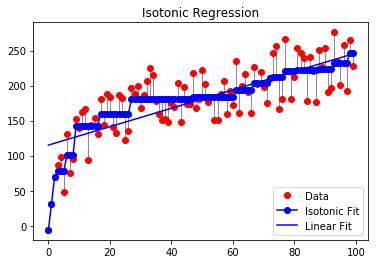

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50,50,size=(n,)) + 50. * np.log1p(np.arange(n))

# Fit IsotonicRegression and LinearRegression models
ir = IsotonicRegression()
y_ = ir.fit_transform(x,y)

lr = LinearRegression()
lr.fit(x[:,np.newaxis],y) # x needs to be 2d for LinearRegression

# Plot result

segments = [[[i,y[i]],[i,y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n,0.5))

fig = plt.figure()
plt.plot(x,y,'r.',markersize=12)
plt.plot(x,y_,'b.-',markersize=12)
plt.plot(x,lr.predict(x[:,np.newaxis]),'b-')
plt.gca().add_collection(lc)
plt.legend(('Data','Isotonic Fit','Linear Fit'),loc='lower right')
plt.title('Isotonic Regression')
plt.show()

# Comparison of kernel ridge regression and SVR

Both kernel ridge regression(KRR) and SVR learn a non-linear function by employing the kernel trick, i.e., they learn a linear function in the space induced by the respective kernel which corresponds to a non-linear function in the original space. They differ in the loss functions (ridge versus epsilon-insensitive losss). In contrast to SVR, fitting a KRR can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than CVR at prediction-time.

This example illustrates both methods on an artificial dataset, which consists of a sinusiodal target function and strong noise added to every fifth datapoint. The first figure compass the learned model of KRR and SVR when both complexity/regularization and bandwidth of the RBF kernel are optimized using grid-search. The learned functions are very similar; however, fitting KRR is approx. seven times faster thaan fitting SVR (both with grid-search). However, prediction of 100000 target values is more than three times faster with SVR since it has learned a sparse model using only approx. 1/3 of the 100 training datapoints as support vectors.

The next figure compares the time for fitting and prediction of KRR and SVR for different sizes of the training set. Fitting KRR is faster than SVR for medium-sized training sets(less than 1000 samples); however, for larger training sets SVR scales better. With regard to prediction time, SVR is faster than KRR for all sizes of the training set because of the learned sparse solution. __Note that the degree of sparsity and thus the prediction time depends on the parameters epsilon and C of the SVR.__

SVR complexity and bandwidth selected and model fitted in 0.404 s
KRR omplexity and bandwidth selected and model fitted in  0.446s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.043 s
KRR prediction for 100000 inputs in 0.204 s


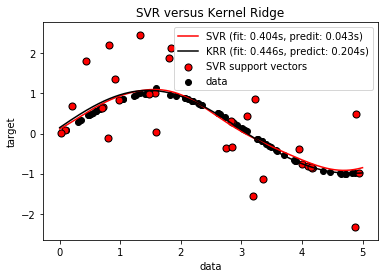

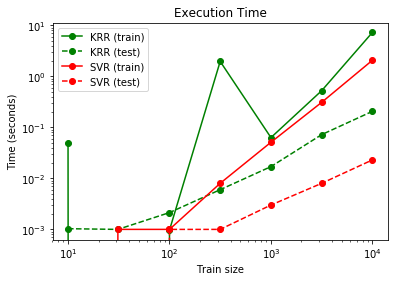

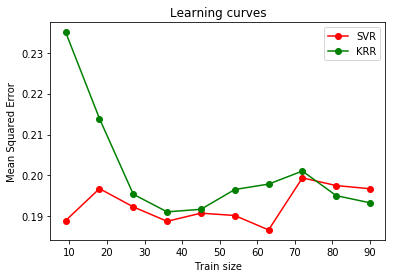

In [14]:
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

## Generate sample data
X = 5 * rng.rand(10000,1)
y = np.sin(X).ravel()

## Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0,5,100000)[:,None]

## Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf',gamma=0.1),
                   param_grid={"C":[1e0,1e1,1e2,1e3],
                               "gamma":np.logspace(-2,2,5)})

kr = GridSearchCV(KernelRidge(kernel='rbf',gamma=0.1),
                  param_grid={"alpha":[1e0,0.1,1e-2,1e-3],
                              "gamma":np.logspace(-2,2,5)})

t0 = time.time()
svr.fit(X[:train_size],y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size],y[:train_size])
kr_fit = time.time() - t0
print("KRR omplexity and bandwidth selected and model fitted in % .3fs"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0],kr_predict))

## Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind],y[sv_ind],c='r',s=50,label='SVR support vectors',
            zorder=2,edgecolors=(0,0,0))
plt.scatter(X[:100],y[:100],c='k',label='data',zorder=1,
            edgecolors=(0,0,0))
plt.plot(X_plot,y_svr,c='r',
         label='SVR (fit: %.3fs, predit: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot,y_kr,c='k',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000,1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1,4,7).astype(np.int)
for name, estimator in {"KRR":KernelRidge(kernel='rbf', alpha=0.1,
                                          gamma=10),
                        "SVR":SVR(kernel='rbf',C=1e1,gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size],y[:train_test_size])
        train_time.append(time.time() - t0)
        
        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)
    
    plt.plot(sizes, train_time,'o-',color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time,'o--',color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

## Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf',C=1e1,gamma=0.1)
kr = KernelRidge(kernel='rbf',alpha=0.1,gamma=0.1)
train_sizes,train_scores_svr,test_scores_svr = \
    learning_curve(svr,X[:100],y[:100],train_sizes=np.linspace(0.1,1,10),
                   scoring="neg_mean_squared_error",cv=10)
train_sizes_abs,train_scores_kr,test_scores_kr = \
    learning_curve(kr,X[:100],y[:100],train_sizes=np.linspace(0.1,1,10),
                   scoring='neg_mean_squared_error',cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1),'o-',color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1),'o-',color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

In [6]:
X_plot

array([[0.00000e+00],
       [5.00005e-05],
       [1.00001e-04],
       ...,
       [4.99990e+00],
       [4.99995e+00],
       [5.00000e+00]])

# Partial Dependence Plots

Partial dependence plots show the dependence between the target function and a set of 'target' festures, marginalizing over the values of all other festures (the complement festures). Due to the limits of human perception, the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

This example shows how to obtain partial dependence plots from a __MLPRegressor__ and a __HistGradientBoostingRegressor__ trained on the California housing dataset. The example is taken from [1].

The plots show four 1-way and two 1-way partial dependence plots (omitted for __MLPRegressor__ due to computation time). The target variables for the one-way PDP are: median income(MedInc), average occupants per household(Avgoccup), median house age (HouseAge), and average rooms per household  (AveRooms)

In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

## California Housing data preprocessing

Center target to avoid gradient boosting init bias: gradient boosting with the 'recursion' method does not account for the initial estimator (here the average target, by default)

In [2]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                                 random_state=0)

## Partial Dependence computation for multi-layer perceptron

Let's fit a MLPRegressor and compute single-variable partial dependence plots

In [3]:
print('Training MLPRegressor...')
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50,50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train,y_train)
print('done in %.3fs'%(time() - tic))
print("Test R2 score: %.3f" % (est.score(X_test,y_test)))

Training MLPRegressor...
done in 8.405s
Test R2 score: 0.812


We configured a pipeline to scale the numerical input features and tuned the neural network size and learning rate to get a reasonable compromise between training time and predictive performance on a test set.

Importantly, this tabular dataset has very different dynamic ranges for its features. Neural networks tend to be very sensitive to features with varying scales and forgetting to preprocess the numeric feature would lead to a very poor model.

It would be possible to get even higher predictive performance with a larger neural network but the training would also be significantly more expensive.

Note that it is important to check that the model is __accurate enough on a test set__ before plotting the partial dependence _since there would be little use in explaining the impact of a given feature on the prediction function of a poor model_.

Let's now compute the partial dependence plots for this neural network using the model-agnostic (brute-force) method:

Computing partial dependence plots...
done in 20.493s


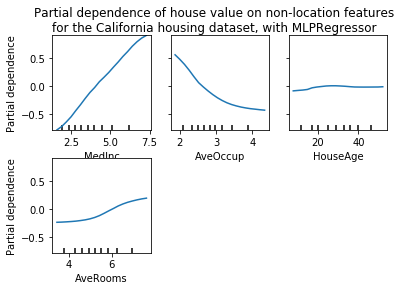

In [4]:
print('Computing partial dependence plots...')
tic = time()
# We don't compute the 2-way PDP (5,1) here, because it is a lot slower
# with the brute method.
features = ['MedInc','AveOccup','HouseAge','AveRooms']
plot_partial_dependence(est,X_train,features,
                        n_jobs=3,grid_resolution=20)
print('done in %.3fs' % (time()-tic))
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with MLPRegressor')
fig.subplots_adjust(hspace=0.3)

## Partial Dependence computation for Gradient Boosting

Let's now fit a GradientBoostingRegressor and compute the partial dependence plots either or one or two variables at a time.

In [5]:
print('Training GradientBoostingRegressor...')
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train,y_train)
print('done in %.3fs' % (time()-tic))
print('Test R2 score: %.3f' % est.score(X_test,y_test))

Training GradientBoostingRegressor...
done in 1.249s
Test R2 score: 0.851


Here, we used the default hyperparameters for the gradient boosting model without any preprocessing as tree-based models are naturally robust to monotonic transformations of numerical features.

Note that on this tabular dataset, __Gradient Boosting Machines are both significantly faster to train and more accurate than neural networks__. It is also significantly cheaper to tune their hyperparameters (the default tend to work well while this is not often the case for neural networks).

Finally, as we will see next, computing partial dependence plots tree-based models is also orders of magnitude faster making it cheap to compute partial dependence plots for pairs of interacting features:

Computing partial dependence plots...
done in 3.735s


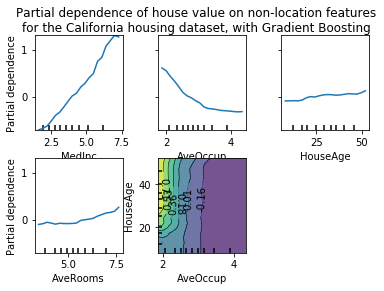

In [6]:
print('Computing partial dependence plots...')
tic = time()
features = ['MedInc','AveOccup','HouseAge','AveRooms',
            ('AveOccup','HouseAge')]
plot_partial_dependence(est,X_train,features,
                        n_jobs=3,grid_resolution=20)
print('done in %.3fs' % (time()-tic))
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with Gradient Boosting')
fig.subplots_adjust(wspace=0.4,hspace=0.3)